<a href="https://colab.research.google.com/github/oluwaseuno25/OLUWASEUN_INFO5502_-Summer2022/blob/main/Lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install the required package
!pip install datascience 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
from datascience import* 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
player_data = Table().read_table("https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab-assignment-7/player_data.csv")
salary_data = Table().read_table("https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab-assignment-7/salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Two histograms should be displayed below


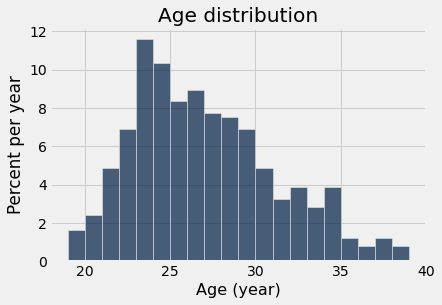

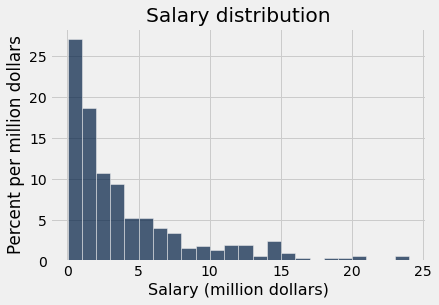

In [5]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')/1000000
    t1 = t.drop('Salary').with_column('Salary', salaries)
    age_bins = np.arange(min(ages), max(ages) + 2, 1) 
    salary_bins = np.arange(min(salaries), max(salaries) + 1, 1)
    t1.hist('Age', bins=age_bins, unit='year')
    plt.title('Age distribution')
    t1.hist('Salary', bins=salary_bins, unit='million dollars')
    plt.title('Salary distribution') 
    
histograms(full_data)
print('Two histograms should be displayed below')

array([  2.65365854e+01,   4.26977577e+06])

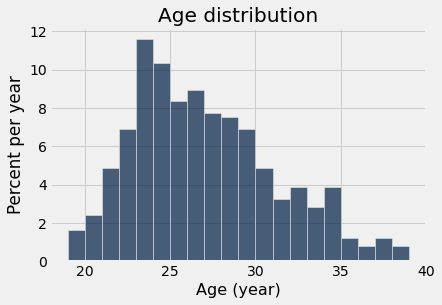

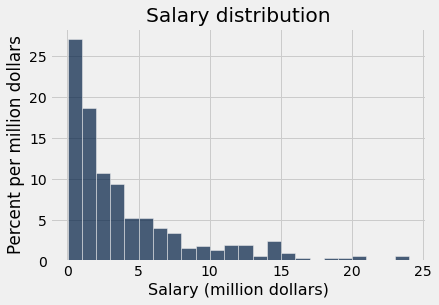

In [7]:
# QUESTION 1 ANSWER
def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)
    age = age_and_salary_data.column("Age")
    salary = age_and_salary_data.column("Salary")
    return make_array(np.average(age), np.average(salary))
    

full_stats = compute_statistics(full_data)
full_stats


In [8]:
# TEST
stats = compute_statistics(full_data)
plt.close()
plt.close()
round(float(stats[0]), 2) == 26.54

True

In [9]:
# TEST
stats = compute_statistics(full_data)
plt.close()
plt.close()
round(float(stats[1]), 2) == 4269775.77

True

In [10]:
# QUESTION 2 ANSWER
convenience_sample = full_data.where("Age", are.below(22))
convenience_sample

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


In [11]:
# TEST
convenience_sample.num_columns == 11

True

In [12]:
# TEST
convenience_sample.num_rows == 44

True

array([  2.03636364e+01,   2.38353382e+06])

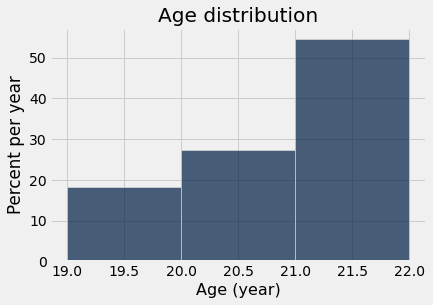

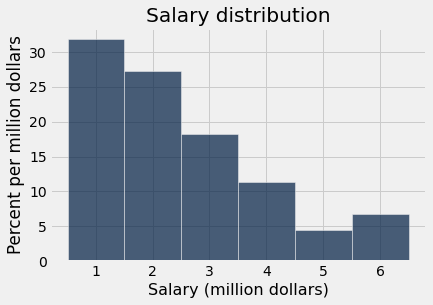

In [13]:
# QUESTION 3 ANSWER
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [14]:
# TEST
len(convenience_stats) == 2

True

In [15]:
# TEST 
round(float(convenience_stats[0]), 2) == 20.36

True

In [ ]:
# TEST
round(float(convenience_stats[1]), 2) == 2383533.82

True

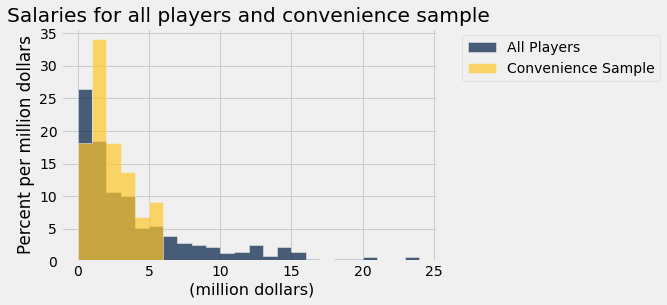

In [16]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    first_salary_in_millions = first.column('Salary')/1000000
    second_salary_in_millions = second.column('Salary')/1000000
    first_tbl_millions = first.drop('Salary').with_column('Salary', first_salary_in_millions)
    second_tbl_millions = second.drop('Salary').with_column('Salary', second_salary_in_millions)
    max_salary = max(np.append(first_tbl_millions.column('Salary'), second_tbl_millions.column('Salary')))
    bins = np.arange(0, max_salary+1, 1)
    first_binned = first_tbl_millions.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second_tbl_millions.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin', unit='million dollars')
    plt.title('Salaries for all players and convenience sample')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

In [17]:
# QUESTION 4 ANSWER
# QUESTION (i) Does the convenience sample give us an accurate picture of the salary of the full population?
# ANSWER : (i) No, the convenience sample does not give us an accurate picture of the age and salary of the full population. 

# QUESTION (ii) Would you expect it to, in general?
# ANSWER : (ii) No, We would not expect it to, because it is biased towards players younger than 22


In [18]:
# Just run this cell

salary_data.sample(44)

PlayerName,Salary
Monta Ellis,8360000
Enes Kanter,5694674
Brendan Haywood,2213688
JaKarr Sampson,507336
Shane Larkin,1606080
Anderson Varejao,9704595
Nene Hilario,13000000
Dorell Wright,3150000
Kostas Papanikolaou,4900963
Thomas Robinson,3678360


In [19]:
# Just run this cell

salary_data.sample(5, with_replacement=False)

PlayerName,Salary
Reggie Jackson,2204370
Kalin Lucas,507336
Nick Young,4994420
Shawne Williams,1227985
Mike Miller,2732000


array([  2.59545455e+01,   4.80091598e+06])

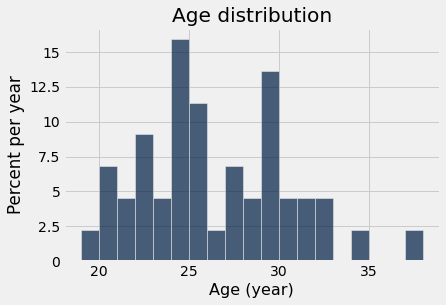

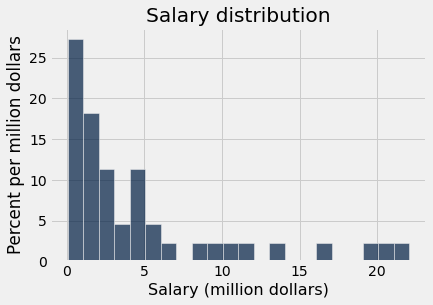

In [ ]:
# QUESTION 5 ANSWER
my_small_srswor_data = full_data.sample(44, with_replacement =False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

In [ ]:
# QUESTION 5 ANSWER CONTINUED
#(1) How much does the average age change across samples?
#The average age tends to stay around the same value as there is a limited range of ages across the samples,

#(2) What about average salary?
# Due to larger variability in salary,the average salary changes by a sizeable factor and it look scattered

array([  2.59545455e+01,   4.80091598e+06])

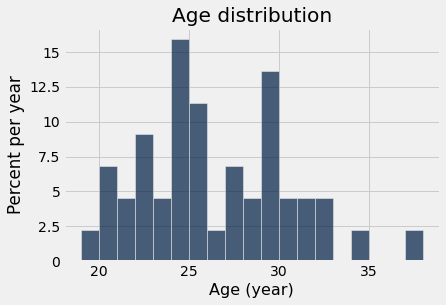

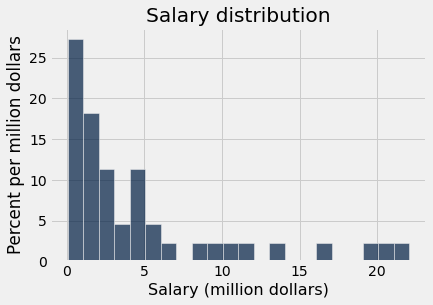

In [ ]:
# QUESTION 6 ANSWER
my_large_srswor_data = full_data.sample(100, with_replacement =False)
my_large_stats = compute_statistics(my_small_srswor_data)
my_large_stats

In [20]:
# QUESTION 6 ANSWER
# #(1) Do the histogram shapes seem to change more or less across samples of 100 than across samples of size 44?
# The histogram seem to change less across samples of this size.

#(2) Are the sample averages and histograms closer to their true values/shape for age or for salary? What did you expect to see?
# They are closer to their true values, which is what we'd expect to see because we are sampling a larger subset of the population.